# Final Project for Machine Learning and Deep Learning (650.025, 22W)
## Movie-Genre-Multi-Label-Text-Classification

[Data Source](https://www.kaggle.com/datasets/cryptexcode/mpst-movie-plot-synopses-with-tags)

<br />
<hr />

     Mustafa Tahir Bingöl
     Mustafa Tayyip Bayram
     January 10, 2023
<hr />
<br />

<h1>Table of Contents<span class="tocSkip"></span></h1>
    <ul> 1. Package Importing </ul>
    <ul> 2. Dataset Importing </ul>
    <ul> 3. Data Preprocessing </ul>
    <ul> 4. Modelling </ul>
    <ul> 4.1 Vectorization (TFIDF, Topic Modelling) </ul>
    <ul> 4.2 Logistic Regression </ul>
    <ul> 4.3 Naive Bayes </ul>
    <ul> 4.5 Neural Network </ul>







# Introduction

## Summary
A typical Binary Classification challenge involves classifying a text content into one of two pre-defined classifications (e.g., spam or non spam). There are various instances in which the document must be classified into more than two classifications. This is a multi-class classification issue in which a data instance is associated with only one of the numerous single class labels.


## Explanation of a features

## Problem Statement
The purpose of this project is to forecast all of the potential movie genres based on the narrative.


# 1. Importings and Data Loading

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import csv
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

from tqdm import tqdm
from bs4 import BeautifulSoup

import unicodedata
import nltk
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import unicodedata
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.naive_bayes import BernoulliNB
import pickle

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers

import wandb
wandb.init(project="movie_genre_classificaiton")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tyyp-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tyyp-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
wandb: Currently logged in as: mutabay. Use `wandb login --relogin` to force relogin


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
# Read the data
preprocessed_data = False
if os.path.exists('Data/preprocessed/mpst_full_data_pp.csv'):
    df = pd.read_csv('Data/preprocessed/mpst_full_data_pp.csv')
    preprocessed_data = True
    print("pp data")
else:
    df = pd.read_csv('Data/mpst_full_data.csv')

pp data


# 2. Data Set Overview

In [4]:
print('Shape of data: ', df.shape)
df.head(5)

Shape of data:  (14828, 6)


,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


Genre of movies are multi-label.

Each observation consists of

Id which identifies the row of plot.
A title which contains the title.
plot_synopsis containing the plot of the movie
70 Movie Genres tags TODO?
Data splitting column
Source of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   imdb_id          14828 non-null  object
 1   title            14828 non-null  object
 2   plot_synopsis    14828 non-null  object
 3   tags             14828 non-null  object
 4   split            14828 non-null  object
 5   synopsis_source  14828 non-null  object
dtypes: object(6)
memory usage: 695.2+ KB


(None, <AxesSubplot:>)

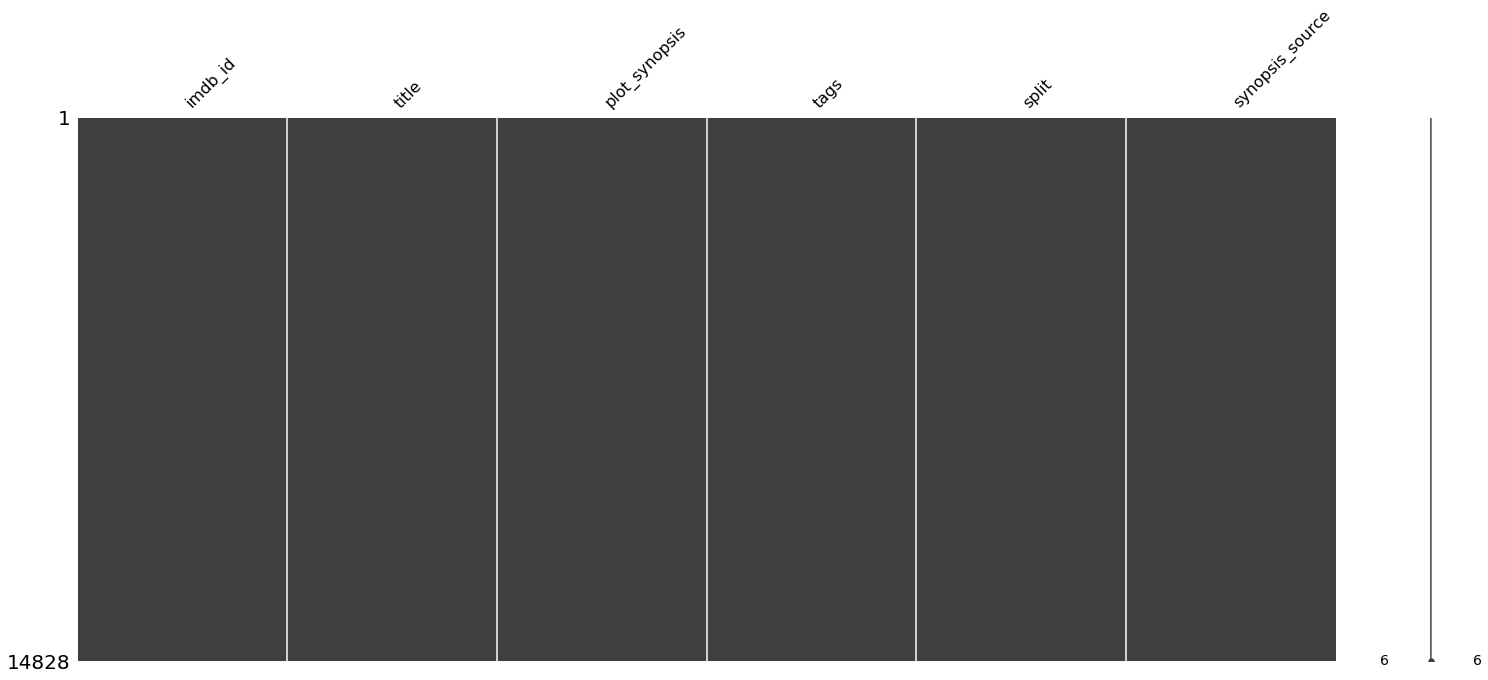

In [5]:
df.info(), msno.matrix(df)

There are no missing value

Let's check duplicates

In [6]:
sort=df.sort_values('imdb_id')
df=sort.drop_duplicates(subset={'title','tags','plot_synopsis'})
df.shape

(14752, 6)

As it seems there was 76 duplicate value.

In [7]:
df=df.sort_values('split')
df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
10426,tt6583664,Scapegoat,There are significant differences between this...,"revenge, suspenseful",test,wikipedia
10878,tt0076911,"What a Nightmare, Charlie Brown!","One winter day, Charlie Brown is trying to pre...",psychedelic,test,wikipedia
1776,tt0499448,The Chronicles of Narnia: Prince Caspian,"On a cloudless night in Narnia, under an eclip...","good versus evil, violence, fantasy, boring, r...",test,imdb
335,tt0077235,Big Wednesday,"Malibu, California, 1962. Matt the Enforcer (J...","cult, philosophical",test,imdb
5293,tt0498399,We Own the Night,"New York, November 1988: A new breed of narcot...","revenge, suspenseful, murder, violence, flashback",test,imdb


In [8]:
df['split'].value_counts()

train    9436
test     2957
val      2359
Name: split, dtype: int64

# 3. Data Preprocessing

In [9]:
# Remove html tags
def remove_tags(sentence):
    html_tag = '<.*?>'
    pp_sentence = re.sub(html_tag, ' ',  sentence)
    return pp_sentence

# Remove accented characters
def remove_accents(sentence):
    pp_sentence = unicodedata.normalize('NFD', sentence)
    pp_sentence = pp_sentence.encode('ascii', 'ignore')
    pp_sentence = pp_sentence.decode("utf-8")
    return pp_sentence

# Remove punctuations
def remove_punctuation(sentence):
    pp_sentence = re.sub(r'[?|!|\'|"|#]', '', sentence)
    pp_sentence = re.sub(r'[,|.|;|:|(|)|{|}|\|/|<|>]|-', ' ', pp_sentence)
    pp_sentence = pp_sentence.replace("\n"," ")
    return pp_sentence

# Remove characters not in the alphabet
def remove_except_alpha(sentence):
    alpha_sentence = re.sub('[^a-z A-Z]+', ' ', sentence)
    return alpha_sentence

# Convert it lowercase
def lower_case(sentence):
    lower_case_sentence = sentence.lower()
    return lower_case_sentence

In [10]:
# Stemming
def stemming(sentence):
    stemmer = SnowballStemmer("english")
    stemmed_words = [stemmer.stem(word) for word in sentence.split()]
    stemmed_sentence=' '.join(stemmed_words)
    return stemmed_sentence

In [12]:
# Remove stop words
def remove_stop_words(sentence):
    stop_words = set(stopwords.words('english'))
    stop_words.update(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
                       "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
                       'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',
                       'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those',
                       'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do','does',
                       'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
                       'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both'])

    no_stop_words=[word for word in sentence.split() if word not in stop_words]
    no_step_sentence = ' '.join(no_stop_words)
    return no_step_sentence

In [22]:
def text_preprocess(sentence):
    pre_processed_sentence = remove_tags(sentence)
    pre_processed_sentence = remove_accents(pre_processed_sentence)
    pre_processed_sentence = remove_punctuation(pre_processed_sentence)
    pre_processed_sentence = remove_except_alpha(pre_processed_sentence)
    pre_processed_sentence = lower_case(pre_processed_sentence)
    pre_processed_sentence = stemming(pre_processed_sentence) # Use Lemmatize instead of stemming
    pre_processed_sentence = remove_stop_words(pre_processed_sentence)

    return pre_processed_sentence

In [23]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tyyp-\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
if not preprocessed_data:
    #df['plot_synopsis'] = df['plot_synopsis'].apply(text_preprocess)
    plot_pp = []
    tag_pp = []
    title_pp = []

    # Preprocess plot
    for plot_sentence in df['plot_synopsis']:
        plot_pp.append(text_preprocess(plot_sentence))

    # Preprocess title
    for title_sentence in df['title']:
        title_pp.append(text_preprocess(title_sentence))

    # Preprocess tags
    for s in tqdm(df['tags'].values):
        s=re.sub(r' ','',s)
        s=re.sub(r',',' ',s)
        s=' '.join(e.lower() for e in s.split() )
        tag_pp.append(s.strip())


    df['plot_pp'] = plot_pp
    df['title_pp'] = title_pp
    df['tag_pp'] = tag_pp

In [35]:
df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,plot_pp,tag_pp,title_pp
10426,tt6583664,Scapegoat,signif differ adapt origin novel wherea action...,"revenge, suspenseful",test,wikipedia,signif differ adapt origin novel wherea action...,revenge suspenseful,scapegoat
10878,tt0076911,"What a Nightmare, Charlie Brown!",one winter day char brown tri pretend musher s...,psychedelic,test,wikipedia,one winter day char brown tri pretend musher s...,psychedelic,nightmar charli brown
1776,tt0499448,The Chronicles of Narnia: Prince Caspian,cloudless night narnia eclip moon insid dark f...,"good versus evil, violence, fantasy, boring, r...",test,imdb,cloudless night narnia eclip moon insid dark f...,goodversusevil violence fantasy boring romantic,chronicl narnia princ caspian
335,tt0077235,Big Wednesday,malibu california matt enforc jan michael vinc...,"cult, philosophical",test,imdb,malibu california matt enforc jan michael vinc...,cult philosophical,big wednesday
5293,tt0498399,We Own the Night,new york novemb new breed narcot sweep great c...,"revenge, suspenseful, murder, violence, flashback",test,imdb,new york novemb new breed narcot sweep great c...,revenge suspenseful murder violence flashback,night


In [36]:
# Drop old columns
df.drop(['title', 'tags', 'plot_synopsis'], axis = 1, inplace = True)
# Saving file
df.to_csv('Data/preprocessed/mpst_full_data_pp.csv', index=False)

# 4. Modeling

## 4.1 Vectorization

In [11]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(df['tag_pp'])

In [12]:
multilabel_y.shape

(14752, 71)

### Splitting data

In [13]:
# x_train1=preprocess_plot[2957:12393]
# x_test1=preprocess_plot[:2957]
# x_cv1=preprocess_plot[12393:]
#
# x_train2=preprocess_title[2957:12393]
# x_test2=preprocess_title[:2957]
# x_cv2=preprocess_title[12393:]
#
# y_train= multilabel_y[2957:12393]
# y_test= multilabel_y[:2957]
# y_cv=   multilabel_y[12393:]

x_train_df = pd.DataFrame()
x_test_df = pd.DataFrame()
x_val_df = pd.DataFrame()

x_train_df['title'] = df['title_pp'][2957:12393]
x_train_df['plot'] = df['plot_pp'][2957:12393]
y_train = multilabel_y[2957:12393]

x_test_df['title'] = df['title_pp'][:2957]
x_test_df['plot'] = df['plot_pp'][:2957]
y_test = multilabel_y[:2957]

x_val_df['title'] = df['title_pp'][12393:]
x_val_df['plot'] = df['plot_pp'][12393:]
y_val= multilabel_y[12393:]

### 200 dim word2vec of plot

In [71]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
trlst=[]
for s in x_train_df['plot']:
    trlst.append(s.split())

w2vtr=Word2Vec(trlst,vector_size =200,min_count=5, workers=4)
w2v_wordstr = list(w2vtr.wv.index_to_key)

In [72]:
model= TfidfVectorizer(min_df=10, ngram_range=(1,3))
tfidf=model.fit_transform(x_train_df['plot'])
dictonary=dict(zip(model.get_feature_names(),model.idf_))

In [85]:
tr=[]
x= model.get_feature_names()
for sentence in tqdm(x_train_df['plot']):
    words=sentence.split()
    vec= np.zeros(200)
    sum=0
    for word in words:
        if word in w2v_wordstr and word in x:
            tfidf=dictonary[word]*(words.count(word)/len(word))
            vec+=w2vtr.wv[word]*tfidf
            sum+=tfidf
    if sum != 0:
        vec=vec/sum
    tr.append(vec)

100%|██████████| 9436/9436 [1:26:12<00:00,  1.82it/s]  


In [86]:
val =[]
x= model.get_feature_names()
for sentence in tqdm(x_val_df['plot']):
    words=sentence.split()
    vec= np.zeros(200)
    sum=0
    for word in words:
        if word in w2v_wordstr and word in x:
            tfidf=dictonary[word]*(words.count(word)/len(word))
            vec+=w2vtr.wv[word]*tfidf
            sum+=tfidf
    if sum != 0:
        vec=vec/sum
    val.append(vec)

100%|██████████| 2359/2359 [22:16<00:00,  1.76it/s] 


In [87]:
ts =[]
x= model.get_feature_names()
for sentence in tqdm(x_test_df['plot']):
    words=sentence.split()
    vec= np.zeros(200)
    sum=0
    for word in words:
        if word in w2v_wordstr and word in x:
            tfidf=dictonary[word]*(words.count(word)/len(word))
            vec+=w2vtr.wv[word]*tfidf
            sum+=tfidf
    if sum != 0:
        vec=vec/sum
    ts.append(vec)

100%|██████████| 2957/2957 [27:29<00:00,  1.79it/s]  


## TF*IDF

In [89]:
vectorizer =TfidfVectorizer(min_df=10,ngram_range=(1,3))
x_train_multilabel_plot = vectorizer.fit_transform(x_train_df['plot'])
x_val_multilabel_plot = vectorizer.transform(x_val_df['plot'])
x_test_multilabel_plot = vectorizer.transform(x_test_df['plot'])

In [90]:
print("Dimensions of train data X:",x_train_multilabel_plot.shape, "Y :",y_train.shape)
print("Dimensions of cv data X:",x_val_multilabel_plot.shape, "Y :",y_val.shape)
print("Dimensions of test data X:",x_test_multilabel_plot.shape,"Y:",y_test.shape)

Dimensions of train data X: (9436, 50037) Y : (9436, 71)
Dimensions of cv data X: (2359, 50037) Y : (2359, 71)
Dimensions of test data X: (2957, 50037) Y: (2957, 71)


## Fourgram of plot

In [93]:
vectorizer =TfidfVectorizer(min_df=5,ngram_range=(4,4))
x_train_multilabel_plot_2 = vectorizer.fit_transform(x_train_df['plot'])
x_val_multilabel_plot_2 = vectorizer.transform(x_val_df['plot'])
x_test_multilabel_plot_2 = vectorizer.transform(x_test_df['plot'])

In [95]:

print("Dimensions of train data X:",x_train_multilabel_plot_2.shape, "Y :",y_train.shape)
print("Dimensions of cv data X:",x_val_multilabel_plot_2.shape, "Y :",y_val.shape)
print("Dimensions of test data X:",x_test_multilabel_plot_2.shape,"Y:",y_test.shape)

Dimensions of train data X: (9436, 3591) Y : (9436, 71)
Dimensions of cv data X: (2359, 3591) Y : (2359, 71)
Dimensions of test data X: (2957, 3591) Y: (2957, 71)


## unigram and bigram of title

In [94]:
vectorizer =TfidfVectorizer(ngram_range=(1,2))
x_train_multilabel_title = vectorizer.fit_transform(x_train_df['title'])
x_val_multilabel_title = vectorizer.transform(x_val_df['title'])
x_test_multilabel_title = vectorizer.transform(x_test_df['title'])

In [96]:
print("Dimensions of train data X:",x_train_multilabel_title.shape, "Y :",y_train.shape)
print("Dimensions of cv data X:",x_val_multilabel_title.shape, "Y :",y_val.shape)
print("Dimensions of test data X:",x_test_multilabel_title.shape,"Y:",y_test.shape)

Dimensions of train data X: (9436, 17467) Y : (9436, 71)
Dimensions of cv data X: (2359, 17467) Y : (2359, 71)
Dimensions of test data X: (2957, 17467) Y: (2957, 71)


## Char gram of plot

In [97]:
vectorizer =TfidfVectorizer(min_df=10,analyzer='char',ngram_range=(4,6))
x_train_multilabel_plot_3 = vectorizer.fit_transform(x_train_df['plot'])
x_val_multilabel_plot_3 = vectorizer.transform(x_val_df['plot'])
x_test_multilabel_plot_3 = vectorizer.transform(x_test_df['plot'])

## matrix factorization using nmf


In [98]:
vectorizer =CountVectorizer(min_df=10)
x_train_multilabel_plot_4 = vectorizer.fit_transform(x_train_df['plot'])
x_val_multilabel_plot_4 = vectorizer.transform(x_val_df['plot'])
x_test_multilabel_plot_4 = vectorizer.transform(x_test_df['plot'])

In [99]:
print("Dimensions of train data X:",x_train_multilabel_plot_4.shape, "Y :",y_train.shape)
print("Dimensions of cv data X:",x_val_multilabel_plot_4.shape, "Y :",y_val.shape)
print("Dimensions of test data X:",x_test_multilabel_plot_4.shape,"Y:",y_test.shape)

Dimensions of train data X: (9436, 13508) Y : (9436, 71)
Dimensions of cv data X: (2359, 13508) Y : (2359, 71)
Dimensions of test data X: (2957, 13508) Y: (2957, 71)


In [100]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=200)
tr1=nmf.fit_transform(x_train_multilabel_plot_4)
val1=nmf.transform(x_val_multilabel_plot_4)
test1=nmf.transform(x_test_multilabel_plot_4)

## (unigram+bigram+trigram+fourgram+word2vec) of plot+unigram and bigram of title+nmf of plot

In [107]:
from scipy.sparse import hstack
x_train_multilabel = hstack([x_train_multilabel_plot,x_train_multilabel_plot_2,x_train_multilabel_title,x_train_multilabel_plot_3,tr,tr1])
print(x_train_multilabel.shape)

x_val_multilabel = hstack([x_val_multilabel_plot,x_val_multilabel_plot_2,x_val_multilabel_title,x_val_multilabel_plot_3,val,val1])
print(x_val_multilabel.shape)

x_test_multilabel = hstack([x_test_multilabel_plot, x_test_multilabel_plot_2,x_test_multilabel_title,x_test_multilabel_plot_3, ts,test1])
print(x_test_multilabel.shape)

(9436, 526237)
(2359, 526237)
(2957, 526237)


In [108]:

dict_store = {"x_train_multilabel": x_train_multilabel, "x_val_multilabel": x_val_multilabel, "x_test_multilabel" : x_test_multilabel, "tr": tr, "ts": ts, "val":val, "multilabel_y": multilabel_y}
%store dict_store

Stored 'dict_store' (dict)


# 4.2 Logistic Regression

In [110]:
start = datetime.now()
step_sizes=[0.01,0.1,1,10]
for alpha in step_sizes:
    lr_classifier = OneVsRestClassifier(LogisticRegression(C=alpha,penalty='l1', solver='liblinear', tol=0.001)) # Lasso regression regularization
    lr_classifier.fit(x_train_multilabel, y_train)
    y_pred_prob = lr_classifier.predict_proba(x_train_multilabel)

    prob_limit=0.2

    lr_predictions = (y_pred_prob >= prob_limit).astype(int)
    y_pred_probc = lr_classifier.predict_proba(x_val_multilabel)

    lr_predictions_2 = (y_pred_probc >= prob_limit).astype(int)

    f_train = f1_score(y_train, lr_predictions, average='micro')
    f_val = f1_score(y_val, lr_predictions_2, average='micro')

    print("Micro-average quality numbers for C=", alpha)
    print("F1-measure for train: {:.4f}".format( f_train))
    print(" F1-measure for val: {:.4f}".format( f_val))
print("Time taken to run this cell :", datetime.now() - start)

Micro-average quality numbers for C= 0.01
F1-measure for train: 0.3230
 F1-measure for cv: 0.3258
Micro-average quality numbers for C= 0.1
F1-measure for train: 0.3793
 F1-measure for cv: 0.3708
Micro-average quality numbers for C= 1
F1-measure for train: 0.4915
 F1-measure for cv: 0.3956
Micro-average quality numbers for C= 10
F1-measure for train: 0.9660
 F1-measure for cv: 0.3463
Time taken to run this cell : 1:21:14.604991


In [111]:
wandb.log({'Logistic regression F1-measure for train: {:.4f}': f_train, 'Logistic regression F1-measure for val: {:.4f}': f_val })

## Decreasing threshold on test


In [112]:
lr_classifier = OneVsRestClassifier(LogisticRegression(C=1,penalty='l2',tol=0.001))     # Ridge
lr_classifier.fit(x_train_multilabel, y_train)
y_pred_prob = lr_classifier.predict_proba(x_test_multilabel)

prob_limit=0.2

y_pred_l2 = (y_pred_prob >= prob_limit).astype(int)
f1_test = f1_score(y_test, y_pred_l2, average='micro')
print("Micro-average quality numbers for C=0.01 and threshold=",prob_limit)
print(" F1-measure for test: {:.4f}".format( f1_test))

Micro-average quality numbers for C=0.01 and threshold= 0.2
 F1-measure for test: 0.3898


In [113]:
wandb.log({'Logistic regression F1-measure l2 for test: {:.4f}': f1_test})

In [119]:
# Saving the model
filename = "lr_model.pickle"
pickle.dump(lr_classifier, open(filename, "wb"))

# load model
# loaded_model = pickle.load(open(filename, "rb"))

## 4.3 Naive Bayes

In [115]:
x_train_multilabel = hstack([x_train_multilabel_plot,x_train_multilabel_plot_2,x_train_multilabel_title,tr,tr1])
print(x_train_multilabel.shape)

x_val_multilabel = hstack([x_val_multilabel_plot,x_val_multilabel_plot_2,x_val_multilabel_title, val,val1])
print(x_val_multilabel.shape)

x_test_multilabel = hstack([x_test_multilabel_plot, x_test_multilabel_plot_2,x_test_multilabel_title, ts, test1])
print(x_test_multilabel.shape)

(9436, 71495)
(2359, 71495)
(2957, 71495)


In [116]:
start = datetime.now()
hp = [0.001,0.01,0.1,1,10]

for alpha in hp:
    nb_classifier = OneVsRestClassifier(BernoulliNB(alpha=alpha))
    nb_classifier.fit(x_train_multilabel, y_train)
    y_train_pred = nb_classifier.predict(x_train_multilabel)
    y_val_pred = nb_classifier.predict(x_val_multilabel)
    f_train_nb = f1_score(y_train, y_train_pred, average='micro')
    f_val_nb = f1_score(y_val, y_val_pred, average='micro')
    print("Micro-average quality numbers for C=", alpha)
    print(" F1-measure for train: {:.4f}".format( f_train_nb))
    print(" F1-measure for cv: {:.4f}".format( f_val_nb))

    wandb.log({'Naive Bayes F1-measure for train: {:.4f}': f_train_nb, 'Naive Baye F1-measure for val: {:.4f}': f_val_nb })

print("Time taken to run this cell :", datetime.now() - start)

Micro-average quality numbers for C= 0.001
 F1-measure for train: 0.7897
 F1-measure for cv: 0.3327
Micro-average quality numbers for C= 0.01
 F1-measure for train: 0.7419
 F1-measure for cv: 0.3419
Micro-average quality numbers for C= 0.1
 F1-measure for train: 0.5849
 F1-measure for cv: 0.3187
Micro-average quality numbers for C= 1
 F1-measure for train: 0.3391
 F1-measure for cv: 0.2525
Micro-average quality numbers for C= 10
 F1-measure for train: 0.1496
 F1-measure for cv: 0.1302
Time taken to run this cell : 0:04:24.258680


In [117]:
nb_classifier = OneVsRestClassifier(BernoulliNB(alpha=0.001))
nb_classifier.fit(x_train_multilabel, y_train)
y_test_pred_prob_nb = nb_classifier.predict_proba(x_test_multilabel)
y_test_pred = (y_test_pred_prob_nb >= 0.01).astype(int)
f_test_nb = f1_score(y_test, y_test_pred, average='micro')
print("Micro-average quality numbers for C=0.001 ")
print(" F1-measure for test: {:.4f}".format( f_test_nb))
wandb.log({'Naive Bayes F1-measure for test: {:.4f}': f_test_nb})

Micro-average quality numbers for C=0.001 
 F1-measure for test: 0.3298


In [120]:
# Saving the model
filename = "nb_model.pickle"
pickle.dump(nb_classifier, open(filename, "wb"))

# load model
# loaded_model = pickle.load(open(filename, "rb"))

## 4.4 Topic Modelling (LDA) + TFIDF
for using randomised search cv and 3 fold cv we merge train and cv together


In [177]:
x_train_df_2 = pd.DataFrame()
x_test_df_2 = pd.DataFrame()

x_train_df_2['plot'] = df['plot_pp'][2957:]
y_train_2 = multilabel_y[2957:]

x_test_df_2['plot'] = df['plot_pp'][2957:]
y_test_2 = multilabel_y[2957:]

In [178]:
vectorizer =TfidfVectorizer(min_df=10,ngram_range=(1,3))
x_train_multilabel1 = vectorizer.fit_transform(x_train_df_2['plot'])
x_test_multilabel1 = vectorizer.transform(x_test_df_2['plot'])

In [179]:
x_train_multilabel1.shape

(11795, 66165)

In [181]:
from sklearn.decomposition import LatentDirichletAllocation

lda=LatentDirichletAllocation()
tr2=lda.fit_transform(x_train_multilabel1)
ts2=lda.transform(x_test_multilabel1)

In [182]:
from scipy.sparse import hstack
x_train_multilabel_2 = hstack([x_train_multilabel1,tr2])
print(x_train_multilabel_2.shape)
x_test_multilabel_2 = hstack([x_test_multilabel1,ts2])
print(x_test_multilabel_2.shape)

(11795, 66175)
(11795, 66175)


### logistic regression


In [184]:
# I am keeping same hyperparameter which i got after tuning above
lr_classifier = OneVsRestClassifier(LogisticRegression(C=1 ,penalty='l2',tol=0.001)) # Ridge regression regularization
lr_classifier.fit(x_train_multilabel_2, y_train_2)
y_pred_prob = lr_classifier.predict_proba(x_train_multilabel_2)

prob_limit=0.2

lr_predictions = (y_pred_prob >= prob_limit).astype(int)
y_pred_probc = lr_classifier.predict_proba(x_test_multilabel_2)

lr_predictions_2 = (y_pred_probc >= prob_limit).astype(int)

f_train = f1_score(y_train_2, lr_predictions, average='micro')
f_test = f1_score(y_test_2, lr_predictions_2, average='micro')

print("Micro-average quality numbers for C=", 1)
print("F1-measure for train: {:.4f}".format( f_train))
print(" F1-measure for test: {:.4f}".format( f_val))
print("Time taken to run this cell :", datetime.now() - start)

wandb.log({'Logistic regression - 2 | F1-measure l2 for test: {:.4f}': f1_test})

Micro-average quality numbers for C= 10
F1-measure for train: 0.5539
 F1-measure for val: 0.3463
Time taken to run this cell : 4:09:59.306633


In [186]:
filename = "lr_topicmodelling_model.pickle"
pickle.dump(lr_classifier, open(filename, "wb"))

# load model
# loaded_model = pickle.load(open(filename, "rb"))

In [185]:
from prettytable import PrettyTable

# Initializing table object
x = PrettyTable()

x.field_names = ["vectorizer","Model","train f1","test f1"]
x.add_row(["tfidf","logistic regression","0.4915","0.3956" ])
x.add_row(["tfidf","naive bayes","0.3391","0.2525" ])
x.add_row(["topic modelling+ tfidf","Logistic Regression","0.5539","0.3463" ])
print(x)

+------------------------+---------------------+----------+---------+
|       vectorizer       |        Model        | train f1 | test f1 |
+------------------------+---------------------+----------+---------+
|         tfidf          | logistic regression |  0.4915  |  0.3956 |
|         tfidf          |     naive bayes     |  0.3391  |  0.2525 |
| topic modelling+ tfidf | Logistic Regression |  0.5539  |  0.3463 |
+------------------------+---------------------+----------+---------+


# 4.5 Deep Learning

In [37]:
def max_len(sentence):
    word=sentence.split()
    return len(word)

max(df['plot_pp'].apply(max_len))

6070

In [68]:
df[-1:]

,imdb_id,split,synopsis_source,plot_pp,tag_pp,title_pp
14751,tt0133046,val,wikipedia,leigh ann watson high school student live smal...,romantic comedy murder,teach mrs tingl


In [76]:
# Merging train and val
x_train_df = pd.concat([x_train_df, x_val_df])

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')


x_train_df['title'] = df['title_pp'][2957:]
x_train_df['plot'] = df['plot_pp'][2957:]
y_train = vectorizer.fit_transform(df['tag_pp'][2957:]).toarray()

x_test_df['title'] = df['title_pp'][:2957]
x_test_df['plot'] = df['plot_pp'][:2957]
y_test = vectorizer.transform(df['tag_pp'][:2957]).toarray()


In [143]:
x_train_df

,title,plot
2957,second,second mysteri deal obsess etern youth mysteri...
2958,shanghai knight,film open forbid citi chon lin fann wong drink...
2959,bollywood hollywood,bollywood hollywood centr charact rahul seth r...
2960,australian rule,isol fiction south australian fish town prospe...
2961,betray,episod present backward narrat begin castl roc...
...,...,...
14747,super,film start februari steel plant lillian ohio e...
14748,profession,mexican revolut rancher j w grant hire four me...
14749,wicker park,matt simon young adverti execut return chicago...
14750,string playtim hell,year ago famous toy maker lose famili great fi...


In [144]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [147]:
vectorizer.inverse_transform(y_train[[5]])

[array(['goodversusevil', 'suspenseful', 'violence'], dtype='<U17')]

In [148]:
vect=Tokenizer()
vect.fit_on_texts(x_train_df['plot'])
vocab_size = len(vect.word_index) + 1
print(vocab_size)

82376


In [149]:
encoded_train = vect.texts_to_sequences(x_train_df['plot'])
max_length = vocab_size
padded_train = pad_sequences(encoded_train, maxlen=1200, padding='post')
print(padded_train)

[[  274   546   412 ...     0     0     0]
 [   76    78  2465 ...     0     0     0]
 [15481  2342  4260 ...     0     0     0]
 ...
 [  756   805   104 ...     0     0     0]
 [   53   818  1440 ...     0     0     0]
 [ 3658   411  2201 ...     0     0     0]]


In [150]:
encoded_test =  vect.texts_to_sequences(x_test_df['plot'])
padded_test = pad_sequences(encoded_test, maxlen=1200, padding='post')
encoded_val = vect.texts_to_sequences(x_val_df['plot'])
padded_val = pad_sequences(encoded_val, maxlen=1200, padding='post')

In [151]:
model = keras.Sequential()
# Configuring the parameters
model.add(layers.Embedding(vocab_size, output_dim=50, input_length=1200))
model.add(layers.LSTM(128, return_sequences=True))
# Adding a dropout layer
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(layers.Dense(71, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1200, 50)          4118800   
                                                                 
 lstm_6 (LSTM)               (None, 1200, 128)         91648     
                                                                 
 dropout_6 (Dropout)         (None, 1200, 128)         0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 71)                4615      
                                                                 
Total params: 4,264,471
Trainable params: 4,264,471
No

In [152]:
from wandb.keras import WandbMetricsLogger

METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = METRICS)

In [153]:
type(y_test)

numpy.ndarray

In [154]:
type(y_train)

numpy.ndarray

In [156]:
history = model.fit(padded_train,y_train,
                    epochs = 16,
                    verbose = 1,
                    validation_data=(padded_test, y_test),
                    batch_size=16, callbacks=[WandbMetricsLogger()])

Epoch 1/16
738/738 [==============================] - 96s 130ms/step - loss: 0.1525 - tp: 1267.0000 - fp: 2674.0000 - tn: 799671.0000 - fn: 33833.0000 - accuracy: 0.9564 - precision: 0.3215 - recall: 0.0361 - auc: 0.7799 - val_loss: 0.1413 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 200938.0000 - val_fn: 9009.0000 - val_accuracy: 0.9571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8304
Epoch 2/16
738/738 [==============================] - 94s 127ms/step - loss: 0.1753 - tp: 414.0000 - fp: 4268.0000 - tn: 798077.0000 - fn: 34686.0000 - accuracy: 0.9535 - precision: 0.0884 - recall: 0.0118 - auc: 0.7606 - val_loss: 0.1418 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 200938.0000 - val_fn: 9009.0000 - val_accuracy: 0.9571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8308
Epoch 3/16
738/738 [==============================] - 94s 127ms/step - loss: 0.1451 - tp: 11.0000 - fp: 14.0000 - tn: 802331.0000 - fn: 35089.0000 - accuracy: 0.9581

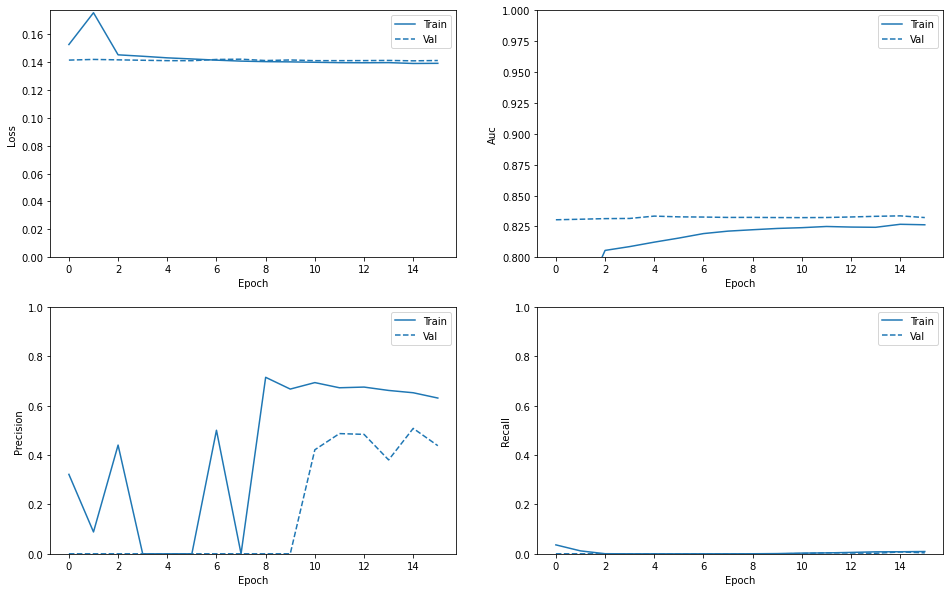

In [157]:

mpl.rcParams['figure.figsize'] = (16, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

plot_metrics(history)

In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score

predictions=model.predict([padded_test])
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for val in thresholds:
    print("For threshold: ", val)
    pred=predictions.copy()

    pred[pred>=val]=1
    pred[pred<val]=0

    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')

    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

    wandb.log({'Deep Learning F1-measure {:.4f}': f1})

For threshold:  0.1
Micro-average quality numbers
Precision: 0.2099, Recall: 0.5705, F1-measure: 0.3069
For threshold:  0.2
Micro-average quality numbers
Precision: 0.2934, Recall: 0.3111, F1-measure: 0.3020
For threshold:  0.3
Micro-average quality numbers
Precision: 0.3845, Recall: 0.1412, F1-measure: 0.2065
For threshold:  0.4
Micro-average quality numbers
Precision: 0.4486, Recall: 0.0121, F1-measure: 0.0236
For threshold:  0.5
Micro-average quality numbers
Precision: 0.4375, Recall: 0.0039, F1-measure: 0.0077
For threshold:  0.6
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.7
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.8
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.9
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
